# Bank Customer Churn Project

Business problem: 
using the Bank_customer_churn dataset predict customer churn. The dtata set has following features RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
'IsActiveMember', 'EstimatedSalary', 'Exited'

We need to determine whether a customer will exit or not? so this is a classification problem therefore will use classification
algorithms namely :-
1. logistic regression
2. RandomForest Classifier
3. XGBoost 

C

## 1. Data Preprocessing

Dataset Link : https://drive.google.com/file/d/1MAzcT5D5AqeOMDfKGW0Xx5-auaoPbDdW/view?usp=sharing 


### Loading dataset and importing libraries

In [742]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [743]:
url='C:/Users/beemu/Downloads/Projects data sets/Bank_customer_churn.csv'
data=pd.read_csv(url)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [744]:
data.shape

(10000, 14)

In [745]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [746]:
# Checking non numerical features or categorical columns

data.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [747]:
#Checking the length of categorical features

len(data.select_dtypes(include='object').columns)

3

In [748]:
# Checking numerical features

data.select_dtypes(include=['int64','float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [749]:
#Checking the length of the nuemerical features

len(data.select_dtypes(include=['float64','int64']).columns)

11

In [750]:
#Statistical summary

data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Dealing with missing data

In [751]:
data.isnull().values.any()

False

In [752]:
data.isnull().values.any().sum()

0

### Encoding the categorical data

Check the categorical features and use one hot encoder to encode the columns

In [753]:
data.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [754]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We need to remove the first three columns since they are not statistically significant  with the target variable

if the customer is staying or leaving the bank?

RowNumber	CustomerId	Surname

In [755]:
data=data.drop(columns=['RowNumber','CustomerId','Surname'])

In [756]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [757]:
data.shape # successfully removed the insignificant columns and updated the dataset

(10000, 11)

In [758]:
# Checking the  categorical columns again
data.select_dtypes(include='object').columns # We now have two categorical columns we need to check the unique values in each categorical column

Index(['Geography', 'Gender'], dtype='object')

In [759]:
data['Geography'].unique()   # there are three unique values in this column

array(['France', 'Spain', 'Germany'], dtype=object)

In [760]:
data['Gender'].unique()      # There are 2 unique values in this column

array(['Female', 'Male'], dtype=object)

In [761]:
data.groupby('Geography').mean()   # we use the aggregate function
# we get an insight that avearge balance inn German is way more than that of France and Spain
# Average age is almost the same in all three countries

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [762]:
data.groupby('Gender').mean()   # We dont have any insight here since ebverything is almost the same

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


### Encode categorical data 
- We encode the categorical data using one hot encoding

In [763]:
data=pd.get_dummies(data=data,drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


- For Germany = 0,0    France = 1,0 and spain 0,1   because we included (drop first therefore France ciolumn has been dropped)
- for gender = Male = 1 and Female = 0

Managed to encode our categorical data


### Countplot (Visualisation)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

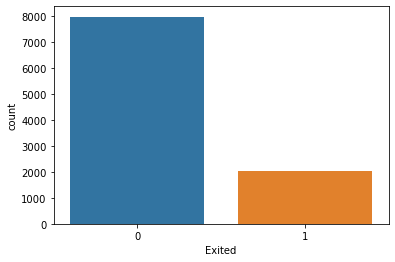

In [764]:
sns.countplot(data['Exited']) # specify the target variable to get target variable insights
plt.plot

# We have 2000 customers who exited the bank and around 8000 still remaining

In [765]:
(data.Exited==0).sum() # to get the actual number of customers staying with the bank

7963

In [766]:
(data.Exited==1).sum() # to get the actual number of customers that exited the bank

2037

### Correlation matrix and heatmap

In [767]:
data_2 = data.drop(columns='Exited') # we drop the target variable

<AxesSubplot:title={'center':'Correlated with Exited'}>

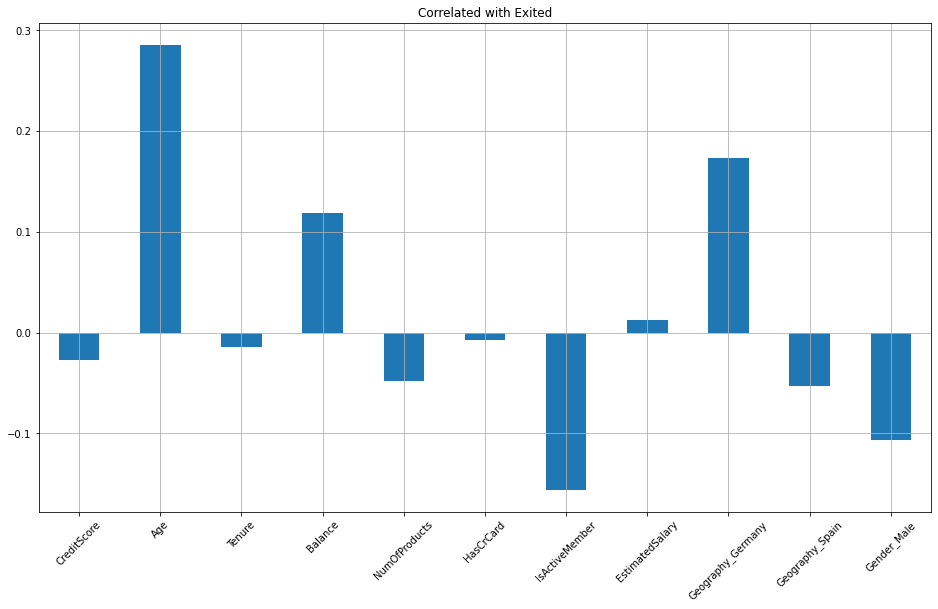

In [768]:
data_2.corrwith(data['Exited']).plot.bar(
figsize=(16,9),title='Correlated with Exited', rot=45,grid=True
)

In [769]:
corr=data.corr()

<AxesSubplot:>

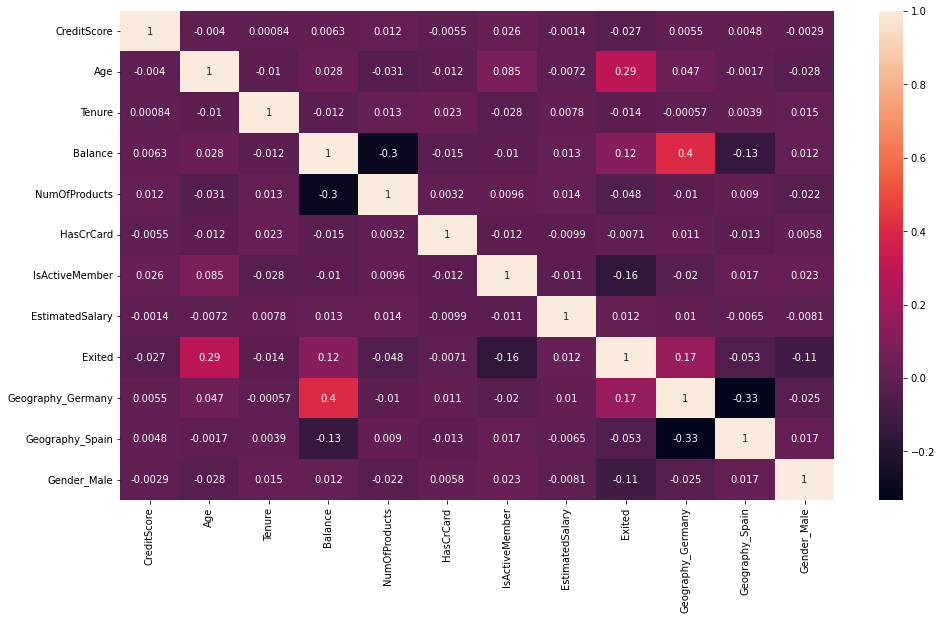

In [770]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

### Splitting the dataset

In [771]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [772]:
#Independent / matrix of features
x= data.drop(columns='Exited')

In [773]:
# Target variable
y=data['Exited']

In [774]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)



In [775]:
x_train.shape

(8000, 11)

In [776]:
x_test.shape

(2000, 11)

In [777]:
y_train.shape

(8000,)

In [778]:
y_test.shape

(2000,)

###  Feature scaling (we do this to get all the variable into same scale)

- we are going top use the standard scaler for feature scaling.
- Standarize features by removing the mean and scaling to unit variance

In [779]:
from sklearn.preprocessing import StandardScaler

In [780]:
sc=StandardScaler()

In [781]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [782]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [783]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

- We have successfully transformed our data

<u>Data Preprocessing Steps taken above</u>
- Importing libraries and dataset
- Data exploration
- Dealing with missing data
- Encode the categorical data
- Countplot
- Correlation matrix and heatmap
- Splitting the dataset
- Feature scaling

## 2.  Building the model

<b> 1. Logistic Regression

In [784]:
from sklearn.linear_model import LogisticRegression

In [785]:
classifier_lr=LogisticRegression(random_state=0)
classifier_lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [786]:
y_pred=classifier_lr.predict(x_test)

To measure Logistic Regression Analysis perfomance we use these classes 
1. Confusion matrix
2. Recall score
3. F1 score
4. Accuracy score
5. precision score

In [787]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

# or from sklearn.metrics import accuracy_score,recall_score,f1_score,confusion_matrix,precison_matrix

In [788]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [789]:
results=pd.DataFrame([['Logistic regression',acc,f1,prec,rec]], 
                    columns=['Model','Accuracy','F1','Precision','Recall'])

In [790]:
cm=confusion_matrix(y_test,y_pred)

print(cm)     # we have  1540 and 86 correct prediction  and  319 and 55 wrong predictions

[[1526   69]
 [ 309   96]]


#### Cross validation - Logistic Regression

In [791]:
# we are going to use cv=10 which means 10 datasets from X-train and y_train 
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier_lr,X=x_train,y=y_train,cv=10)

print("Accuracy is  {:.2f} %". format(accuracies.mean()*100))

print("Standard Deviation is {:.2f} %". format(accuracies.std()*100))

Accuracy is  80.84 %
Standard Deviation is 0.88 %


<b> 2. Random Forest Classifier

In [792]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf=RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [793]:
y_pred=classifier_rf.predict(x_test)

In [794]:
# Checking Random forest Classifier algorithm performance 

from sklearn.metrics import accuracy_score,recall_score,f1_score,confusion_matrix,precision_score

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [795]:
model_results=pd.DataFrame([['Random Forest',acc,f1,prec,rec]], 
                    columns=['Model','Accuracy','F1','Precision','Recall'])

In [796]:
  # this model has 86.5 % accuracy its performing better than LR algorithm

In [797]:
results=results.append(model_results, ignore_index=True)


In [798]:
cm=confusion_matrix(y_test,y_pred)

print(cm)     # we have  1519 and 212 correct predictions  and  193 and 76 wrong predictions

[[1523   72]
 [ 194  211]]


#### Cross Validation - Random Forest

In [799]:
# we are going to use cv=10 which means 10 datasets from X-train and y_train 
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier_rf,X=x_train,y=y_train,cv=10)

print("Accuracy is  {:.2f} %". format(accuracies.mean()*100))

print("Standard Deviation is {:.2f} %". format(accuracies.std()*100))

Accuracy is  85.96 %
Standard Deviation is 1.02 %


<b> 3. XGBoost

    Documentation: https://xgboost.readthedocs.io/en/latest/
- Is an implementation of gradient boosted decision tree designed for speed and perfomance that is dominative competitive machine learning.
    

In [800]:
#!pip install XGBoost

In [801]:
from xgboost import XGBClassifier
classifier_xgb=XGBClassifier()
classifier_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [802]:
y_pred=classifier_xgb.predict(x_test)

In [803]:
# Checking RXGBoost Classifier algorithm performance 

from sklearn.metrics import accuracy_score,recall_score,f1_score,confusion_matrix,precision_score

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [804]:
model_results1=pd.DataFrame([['XGBOOST',acc,f1,prec,rec]], 
                    columns=['Model','Accuracy','F1','Precision','Recall'])

In [805]:
results = results.append(model_results1,ignore_index=True)

In [806]:
cm=confusion_matrix(y_test,y_pred)

print(cm)     # we have  1483 and 218 correct predictions  and  187 and 112 wrong predictions

[[1491  104]
 [ 187  218]]


#### Cross Validation - XGBoost 

In [807]:
# we are going to use cv=10 which means 10 datasets from X-train and y_train 
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier_xgb,X=x_train,y=y_train,cv=10)

print("Accuracy is  {:.2f} %". format(accuracies.mean()*100))

print("Standard Deviation is {:.2f} %". format(accuracies.std()*100))

Accuracy is  85.24 %
Standard Deviation is 1.22 %


- On the basis of the Models perfomance comparison i choose <b>Random Forest ASlgorithm</b> with 86.7 % accuracy compared to XGBoost and Logistic Regression
- The cross validation accuracy is 85.96 %

## Randomised Search to find the best parameters

In [808]:

from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV

In [809]:

parameters = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [6400]}


In [810]:
parameters

{'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
 'max_depth': [None, 3, 5, 10],
 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
 'max_features': [0.5, 1, 'sqrt', 'auto'],
 'max_samples': [6400]}

In [811]:
randomized_search = RandomizedSearchCV(estimator=classifier_rf,
                                       param_distributions=parameters,
                                       n_iter =5,
                                      n_jobs=1,
                                      scoring='roc_auc',
                                      cv=5,
                                      verbose=True)

In [812]:

# fit
randomized_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=5, n_jobs=1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [6400],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   scoring='roc_auc', verbose=True)

In [813]:
randomized_search.best_params_

{'n_estimators': 20,
 'min_samples_split': 10,
 'min_samples_leaf': 17,
 'max_samples': 6400,
 'max_features': 0.5,
 'max_depth': None}

In [814]:
randomized_search.best_estimator_

RandomForestClassifier(max_features=0.5, max_samples=6400, min_samples_leaf=17,
                       min_samples_split=10, n_estimators=20, random_state=0)

In [815]:
randomized_search.best_score_

0.8589933797803984

## Final Model Random Forest Classifier

In [816]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(max_depth=10, max_features='auto', max_samples=6400,
                       min_samples_leaf=9, min_samples_split=12,
                       n_estimators=60, random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features='auto', max_samples=6400,
                       min_samples_leaf=9, min_samples_split=12,
                       n_estimators=60, random_state=0)

In [817]:
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)


model_resultsF=pd.DataFrame([['Final Random Forest',acc,f1,prec,rec]], 
                    columns=['Model','Accuracy','F1','Precision','Recall'])

results = results.append(model_resultsF,ignore_index=True)
results


,Model,Accuracy,F1,Precision,Recall
0,Logistic regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8670,0.613372,0.745583,0.520988
2,XGBOOST,0.8545,0.599725,0.677019,0.538272
3,Final Random Forest,0.8705,0.605784,0.789683,0.491358


- Our hyper parametezed Random Forest  accuracy has increased 
- The model perfomance is increased its now 87.05 %

In [818]:
cm=confusion_matrix(y_test,y_pred) # We have 1542 and 199 correct and 206and 53 incorrect predictions

print(cm)   

[[1542   53]
 [ 206  199]]


###  Cross Validation - Final Random Forest Algorithm

In [819]:
# we are going to use cv=10 which means 10 datasets from X-train and y_train 
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)

print("Accuracy is  {:.2f} %". format(accuracies.mean()*100))

print("Standard Deviation is {:.2f} %". format(accuracies.std()*100))

Accuracy is  86.02 %
Standard Deviation is 0.86 %


## Predicting a single observation

In [820]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [821]:
single_obs=[[625,45,5,12500.01,1,0,1,101348.88,0,0,1]]

In [822]:
single_obs

[[625, 45, 5, 12500.01, 1, 0, 1, 101348.88, 0, 0, 1]]

In [823]:
classifier.predict(sc.transform(single_obs))    # because we used feature scaling of the test data we need to transfrom the obs

array([0], dtype=int64)

# Conclusion: 

<b>The customer is staying With the bank [0]